In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#import Twitter API keys
from config import access_token,access_token_secret,consumer_key,consumer_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#target_handles = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
# BBC Twitter Data
target_handle = "@BBC"
# Counter
counter = 1
# Variables for holding sentiments
bbc_sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Media Source":target_handle,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                            "Tweet": tweet["text"]})        
        # Add to counter 
        counter = counter + 1

In [5]:
# CBS Twitter Data
target_handle = "@CBS"
# Counter
counter = 1
# Variables for holding sentiments
cbs_sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"Media Source":target_handle,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                            "Tweet": tweet["text"]})        
        # Add to counter 
        counter = counter + 1

In [6]:
# CBS Twitter Data
target_handle = "@CNN"
# Counter
counter = 1
# Variables for holding sentiments
cnn_sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        # Add sentiments for each tweet into an array
        cnn_sentiments.append({"Media Source":target_handle,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                            "Tweet": tweet["text"]})        
        # Add to counter 
        counter = counter + 1

In [7]:
# FoxNews Twitter Data
target_handle = "@FoxNews"
# Counter
counter = 1
# Variables for holding sentiments
fox_sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        # Add sentiments for each tweet into an array
        fox_sentiments.append({"Media Source":target_handle,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                            "Tweet": tweet["text"]})        
        # Add to counter 
        counter = counter + 1

In [8]:
# NY Times Twitter Data
target_handle = "@nytimes"
# Counter
counter = 1
# Variables for holding sentiments
nytimes_sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        # Add sentiments for each tweet into an array
        nytimes_sentiments.append({"Media Source":target_handle,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                            "Tweet": tweet["text"]})        
        # Add to counter 
        counter = counter + 1

In [9]:
cbs_df= pd.DataFrame.from_dict(cbs_sentiments)
bbc_df= pd.DataFrame.from_dict(bbc_sentiments)
cnn_df= pd.DataFrame.from_dict(cnn_sentiments)
nyt_df= pd.DataFrame.from_dict(nytimes_sentiments)
fox_df= pd.DataFrame.from_dict(fox_sentiments)
total_sentiment_df=pd.concat([bbc_df, cbs_df,cnn_df,nyt_df,fox_df], axis=0)
total_sentiment_df= total_sentiment_df[["Media Source", "Compound","Positive", "Negative","Neutral",
                                        "Date","Tweets Ago","Tweet"]]
total_sentiment_df.head()

Media Source  Compound  Positive  Negative  Neutral  \
0         @BBC   -0.6249     0.124     0.581    0.295   
1         @BBC    0.6908     0.231     0.769    0.000   
2         @BBC    0.7840     0.345     0.655    0.000   
3         @BBC    0.0000     0.000     1.000    0.000   
4         @BBC    0.0000     0.000     1.000    0.000   

                             Date  Tweets Ago  \
0  Thu Mar 29 11:00:21 +0000 2018           1   
1  Thu Mar 29 10:18:02 +0000 2018           2   
2  Thu Mar 29 08:00:12 +0000 2018           3   
3  Thu Mar 29 07:27:07 +0000 2018           4   
4  Thu Mar 29 07:00:10 +0000 2018           5   

                                               Tweet  
0  This bizarrely cute creature is just the lates...  
1  RT @BBCRadio2: Today we say farewell to the br...  
2  🐶❤️ Biscuit the robotic pup is helping the eld...  
3  👀🌸 The world famous cherry blossoms of Japan b...  
4  What do you get if you cross a polar bear and ...

In [10]:
total_sentiment_df.to_csv("Media_Sentiment_Data.csv", header = True)

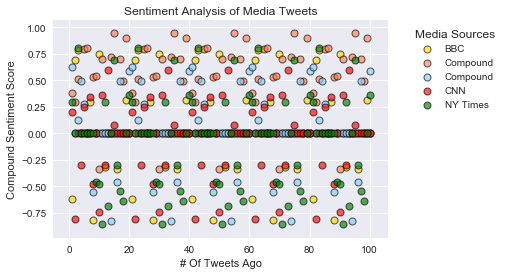

In [11]:
sns.set()

bbc_plt= plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], 
                       color="gold", linewidth=1.0, alpha=0.65, edgecolors="black", label="BBC")
cbs_plt= plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], 
                       color="coral", linewidth=1.0, alpha=0.65, edgecolors="black", Label = "CBS")
fox_plt= plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], 
                       color="lightskyblue", linewidth=1.0, alpha=0.65, edgecolors="black", Label= "Fox News")
cnn_plt= plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], 
                       color="red", linewidth=1.0, alpha=0.65, edgecolors="black", label="CNN")
nyt_plt= plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], 
                       color="green", linewidth=1.0, alpha=0.65, edgecolors="black", label="NY Times")

plt.legend(handles=[bbc_plt, cbs_plt, fox_plt, cnn_plt, nyt_plt], bbox_to_anchor=(1.2, 1), 
           fancybox=True, shadow=True, ncol=1, loc='upper center', title="Media Sources")

plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("# Of Tweets Ago")
plt.ylabel("Compound Sentiment Score")

plt.savefig("Sentiment Analysis of Media Tweets_scatter.png")
plt.grid(True)
plt.show()

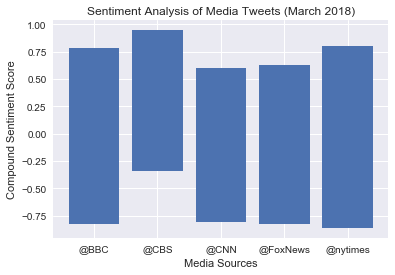

In [12]:
#Sentiment Analysis of Media Tweet (bar chart)
sns.set()

plt.title("Sentiment Analysis of Media Tweets (March 2018)")
plt.xlabel("Media Sources")
plt.ylabel("Compound Sentiment Score")

plt.bar(total_sentiment_df["Media Source"],total_sentiment_df["Compound"], alpha=1, align="center"      )

plt.savefig("Sentiment Analysis of Media Tweets_bar.png")
plt.show()